In [3]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

## Credit data

In [4]:
with open('credit_data_X.npy', 'rb') as f:
    X = np.load(f)

with open('credit_data_y.npy', 'rb') as f:
    y = np.load(f)
    
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2)

In [7]:
X_tr.shape, X_t.shape

((1600, 3), (400, 3))

In [8]:
y_tr.shape, y_t.shape

((1600, 1), (400, 1))

In [9]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy')

rf.fit(X_tr, y_tr)

/tmp/ipykernel_8982/1666803979.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_tr, y_tr)


RandomForestClassifier(criterion='entropy', n_estimators=500)

In [11]:
y_pred = rf.predict(X_t)

print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       337
           1       0.96      0.87      0.92        63

    accuracy                           0.97       400
   macro avg       0.97      0.93      0.95       400
weighted avg       0.97      0.97      0.97       400



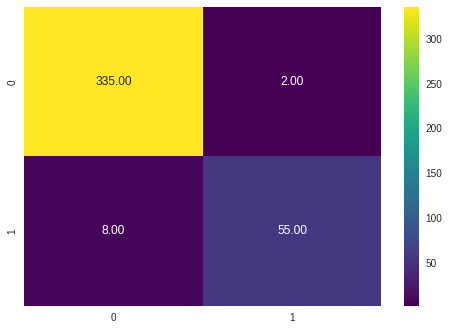

In [13]:
sns.heatmap(confusion_matrix(y_t, y_pred), annot=True, fmt='.2f', cmap='viridis');

## Census

In [15]:
with open('/home/tuts/data/mldsfromatoz/census.pkl', 'rb') as f:
    X_tr, y_tr, X_t, y_t = pickle.load(f)

In [16]:
X_tr.shape, X_t.shape

((27676, 108), (4885, 108))

In [17]:
rf_c = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42)

In [18]:
rf_c.fit(X_tr, y_tr)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42)

In [19]:
y_pred = rf_c.predict(X_t)

In [21]:
print(classification_report(y_t, y_pred, digits=5))

              precision    recall  f1-score   support

       <=50K    0.88121   0.92201   0.90115      3693
        >50K    0.71792   0.61493   0.66245      1192

    accuracy                        0.84708      4885
   macro avg    0.79957   0.76847   0.78180      4885
weighted avg    0.84137   0.84708   0.84291      4885



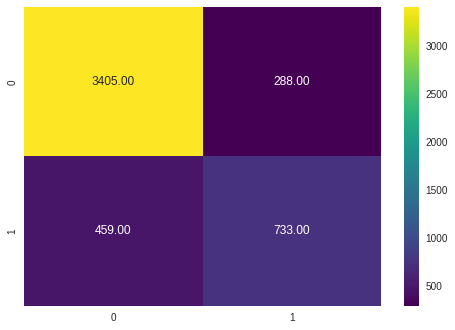

In [22]:
sns.heatmap(confusion_matrix(y_t, y_pred), annot=True, fmt='.2f', cmap='viridis');

0.8470829068577277

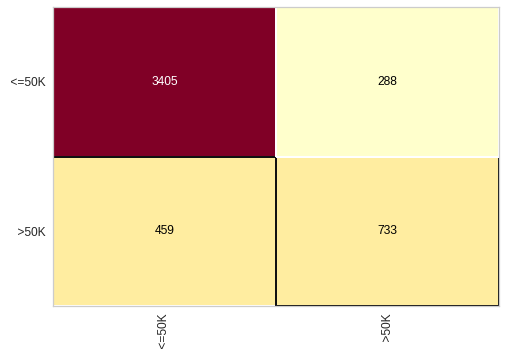

In [23]:
cm = ConfusionMatrix(rf_c)
cm.fit(X_tr, y_tr)
cm.score(X_t, y_t)